In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import xb.plotting as xp
import json
import os

In [3]:
path_unsegmented_datasets='../../../figures/2.comparison_between_datasets/input_for_segmentation/'
datasets=os.listdir(path_unsegmented_datasets)
ds=datasets[1]

In [4]:
ds='CosMx'

In [5]:
cosmx_transcripts=pd.read_csv('../../../figures/2.comparison_between_datasets/input_for_segmentation/CosMx/transcripts.csv')

In [6]:
os.listdir('../../../figures/2.comparison_between_datasets/input_for_segmentation/CosMx/')

['.ipynb_checkpoints',
 'adata.h5ad',
 'cosmx_subset.png',
 'DAPI.tif',
 'segmented_mask.tif',
 'transcripts.csv',
 'transcripts_with_cell_assignment.csv']

In [7]:
cosmx_transcripts

,Unnamed: 0,x_global_px,y_global_px,target
0,0,-494466.803333,9108.900,Gfap
1,1,-494237.833333,10084.600,Ngf
2,2,-494239.533333,10080.917,Igfbp7
3,3,-494227.493333,10072.143,Gnaq
4,4,-494219.603333,10065.550,Cldn5
...,...,...,...,...
116159822,116159822,-454293.000000,-22302.590,Apoe
116159823,116159823,-454296.300000,-22325.660,Prkacb
116159824,116159824,-454262.000000,-22325.610,Cox6c
116159825,116159825,-454297.800000,-22326.310,Malat1


In [8]:
xmin=cosmx_transcripts['x_global_px'].min()
ymin=cosmx_transcripts['y_global_px'].min()
xmax=cosmx_transcripts['x_global_px'].max()
ymax=cosmx_transcripts['y_global_px'].max()

In [9]:
adata=sc.read(path_unsegmented_datasets+ds+'/adata.h5ad')
adata.obs['X']=adata.obs['x_centroid']
adata.obs['Y']=adata.obs['y_centroid']

adata.obs['x_centroid']=xmax-adata.obs['X']
adata.obs['y_centroid']=ymax-adata.obs['Y']

In [10]:
ob=open('../../../figures/2.comparison_between_datasets/polygons/regions_CosMx.json')
js=json.load(ob)
output=pd.DataFrame(columns=['y','x','region_annotation','region_general'])

In [11]:
nu=0
for ob in js:
    for num in range(0,len(ob['coordinates'][0])):
        output.loc[nu,:]=list([ob['coordinates'][0][num][0],ob['coordinates'][0][num][1],ob['name'],ob['name'].replace(' [1]','').replace('D: ','')])
        nu=nu+1

In [12]:
from shapely.geometry import Point, Polygon
def domainassign(plsin,adatadom):
    adatadom.obs['region_annotation']='None'
    plt.figure()
    for sel in plsin['region_annotation'].unique():
        plsub=plsin[plsin['region_annotation']==sel]
        if plsub.shape[0]>2:
    #        plt.figure()
            coord = np.array(plsub[['y','x']]).tolist()
            coord.append(coord[0])
            poli=Polygon(coord)
            xs, ys = zip(*coord) #create lists of x and y values
            plt.plot(xs,ys,color='black') 
            plt.title(sel)
            for n in adatadom.obs.index:
                pnt=Point(adatadom.obs.loc[n,'y_centroid'],adatadom.obs.loc[n,'x_centroid'])
                if pnt.within(poli)==True:
                    adatadom.obs.loc[n,'region_annotation']=sel
    plt.scatter(adatadom.obs['y_centroid'],adatadom.obs['x_centroid'],s=0.5)
    plt.show() # if you need...
    return adatadom

In [13]:
def domainassign_plot(plsin,adatadom):
    adatadom.obs['region_annotation']='None'
    plt.figure()
    for sel in plsin['region_annotation'].unique():
        plsub=plsin[plsin['region_annotation']==sel]
        if plsub.shape[0]>2:
    #        plt.figure()
            coord = np.array(plsub[['y','x']]).tolist()
            coord.append(coord[0])
            poli=Polygon(coord)
            xs, ys = zip(*coord) #create lists of x and y values
            plt.plot(xs,ys,color='black') 
            plt.title(sel)
    plt.scatter(adatadom.obs['y_centroid'],adatadom.obs['x_centroid'],s=0.5)
    plt.show() # if you need...
    return adatadom

In [14]:
dictio_region=dict(zip(output['region_annotation'],output['region_general']))

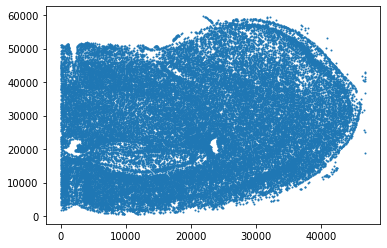

In [15]:
plt.scatter(adata.obs.X,adata.obs.Y,s=1)

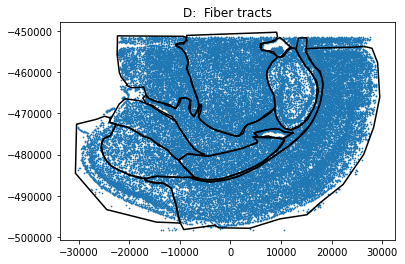

In [16]:
pls=output
#pls['x']=pls['x']*0.2125
#pls['y']=pls['y']*0.2125
adata_anno=domainassign(pls,adata)

In [17]:
adata_anno.obs['spatial annotation']=adata_anno.obs['region_annotation']

In [21]:
adata_anno.write('../../../figures/2.comparison_between_datasets/with_regional_anno_segmented/anno_CosMx.h5ad')

In [20]:
adata_anno

AnnData object with n_obs × n_vars = 39494 × 960
    obs: 'x_centroid', 'y_centroid', 'X', 'Y', 'region_annotation', 'spatial annotation'